In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("netflix_customer_churn.csv")
df.head(2)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi


In [3]:
df.number_of_profiles.unique()

array([1, 5, 2, 3, 4])

In [4]:
df.shape

(5000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   customer_id             5000 non-null   object 
 1   age                     5000 non-null   int64  
 2   gender                  5000 non-null   object 
 3   subscription_type       5000 non-null   object 
 4   watch_hours             5000 non-null   float64
 5   last_login_days         5000 non-null   int64  
 6   region                  5000 non-null   object 
 7   device                  5000 non-null   object 
 8   monthly_fee             5000 non-null   float64
 9   churned                 5000 non-null   int64  
 10  payment_method          5000 non-null   object 
 11  number_of_profiles      5000 non-null   int64  
 12  avg_watch_time_per_day  5000 non-null   float64
 13  favorite_genre          5000 non-null   object 
dtypes: float64(3), int64(4), object(7)
memor

In [6]:
df.subscription_type.unique()

array(['Basic', 'Standard', 'Premium'], dtype=object)

In [7]:
df.payment_method.unique()

array(['Gift Card', 'Crypto', 'Debit Card', 'PayPal', 'Credit Card'],
      dtype=object)

In [8]:
df.duplicated().sum()

np.int64(0)

In [9]:
df.gender.unique()

array(['Other', 'Female', 'Male'], dtype=object)

In [10]:
df.favorite_genre.unique()

array(['Action', 'Sci-Fi', 'Drama', 'Horror', 'Romance', 'Comedy',
       'Documentary'], dtype=object)

In [11]:
df.region.unique()

array(['Africa', 'Europe', 'Asia', 'Oceania', 'South America',
       'North America'], dtype=object)

In [12]:
df.churned.value_counts()

,count
churned,
1,2515
0,2485


##**count/other plots**

<Axes: xlabel='churned', ylabel='count'>

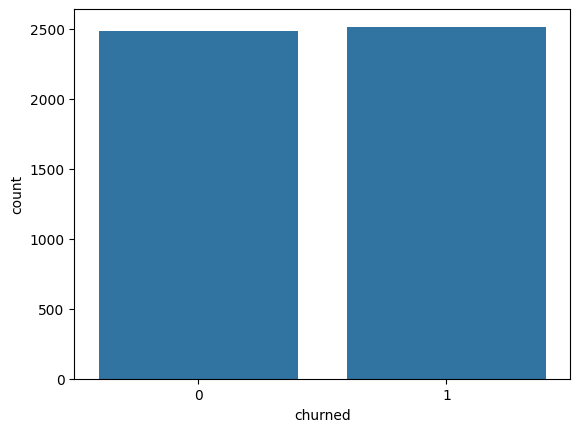

In [13]:
sns.countplot(x = 'churned', data = df)

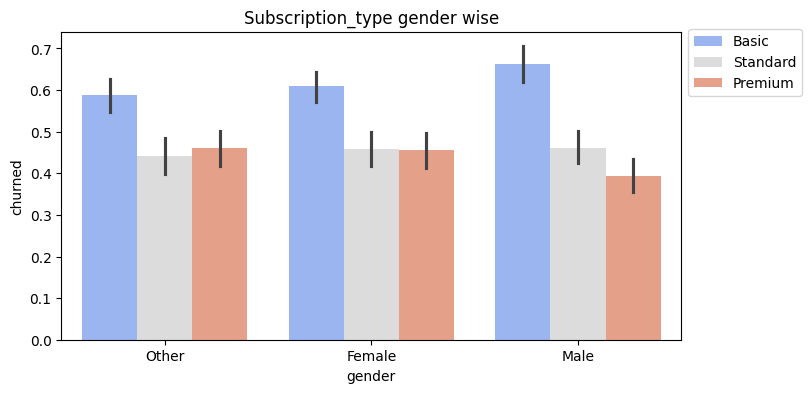

In [14]:
plt.figure(figsize = (8,4))
sns.barplot(x = "gender", y= 'churned', data = df, hue = 'subscription_type', palette = 'coolwarm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))   # 1 means right edge, 0.9 means top vertically
plt.title('Subscription_type gender wise')
plt.show()

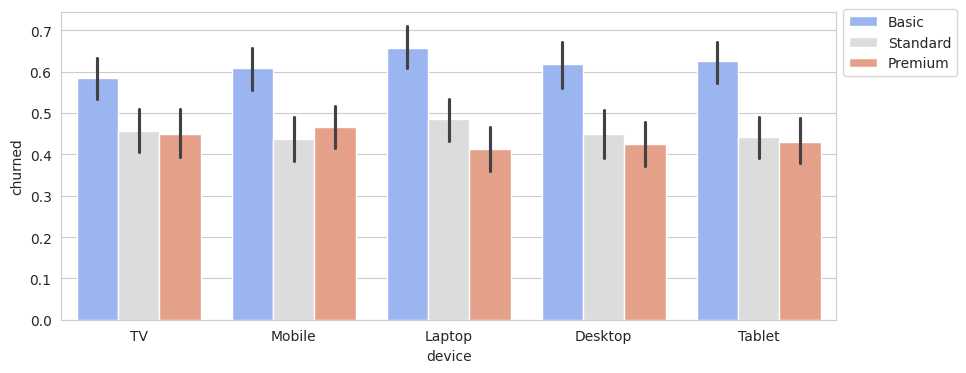

In [15]:
plt.figure(figsize = (10,4))
sns.set_style("whitegrid")
sns.barplot(x='device', y='churned', hue='subscription_type', data=df, palette='coolwarm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))   # 1 means right edge, 0.9 means top vertically


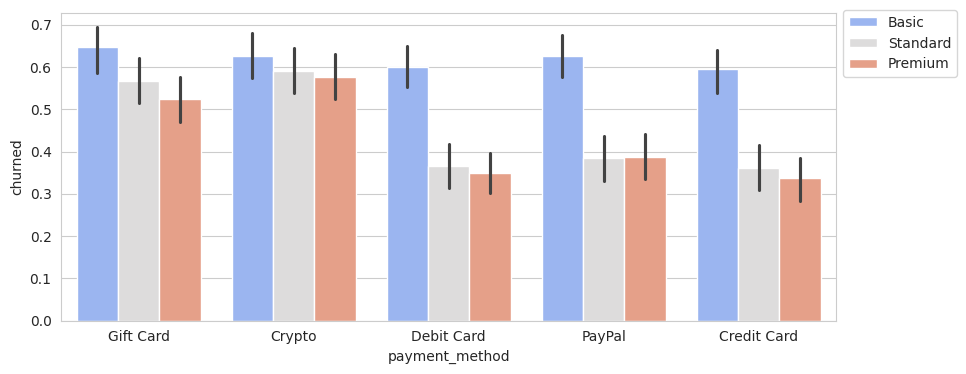

In [16]:
plt.figure(figsize = (10,4))
sns.set_style("whitegrid")
sns.barplot(x='payment_method', y='churned', hue='subscription_type', data=df, palette='coolwarm')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))   # 1 means right edge, 0.9 means top vertically


##**churned %age with other variabes**

<Axes: xlabel='gender', ylabel='churned'>

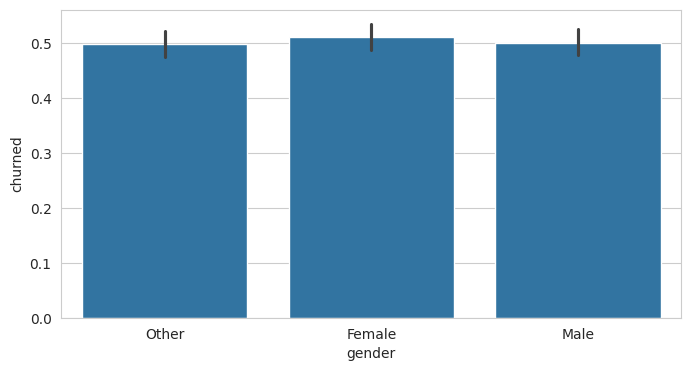

In [17]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'gender', y = 'churned', data = df)

<Axes: xlabel='device', ylabel='churned'>

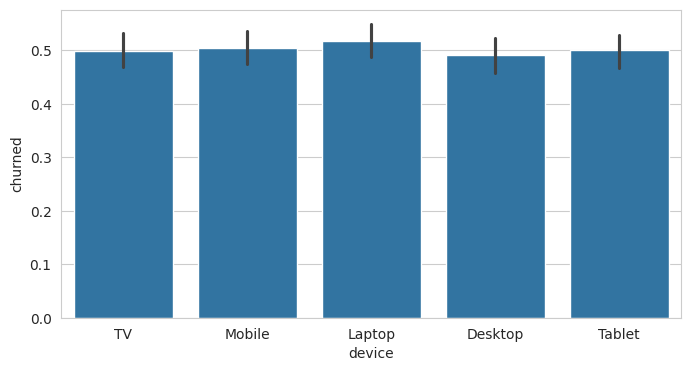

In [18]:
plt.figure(figsize= (8,4))
sns.barplot(x = 'device', y = 'churned', data = df)

<Axes: xlabel='payment_method', ylabel='churned'>

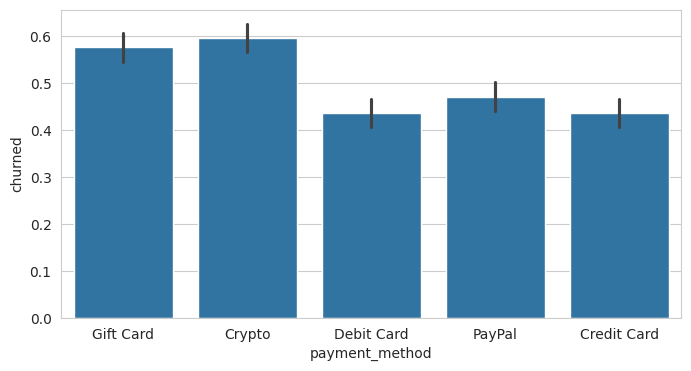

In [19]:
plt.figure(figsize=(8,4))
sns.barplot(x='payment_method', y='churned', data = df)

<Axes: xlabel='churned', ylabel='avg_watch_time_per_day'>

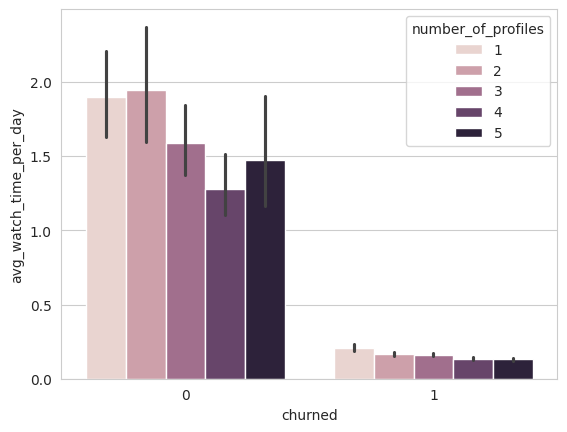

In [20]:
sns.barplot(y = 'avg_watch_time_per_day', x = 'churned', data = df, hue = 'number_of_profiles')

<Axes: xlabel='favorite_genre', ylabel='churned'>

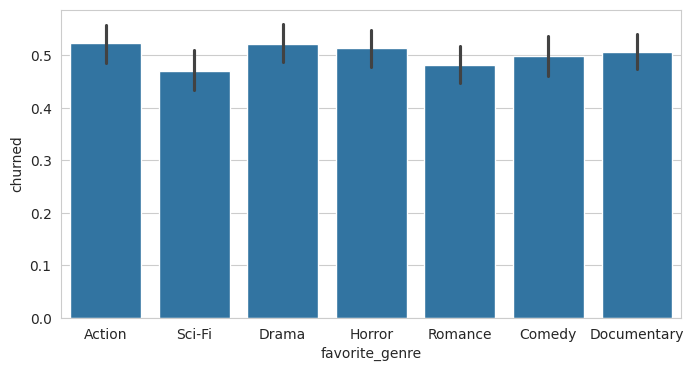

In [21]:
sns.set_style('whitegrid')
plt.figure(figsize = (8,4))
sns.barplot(x = 'favorite_genre', y = 'churned', data = df)

<Axes: xlabel='region', ylabel='churned'>

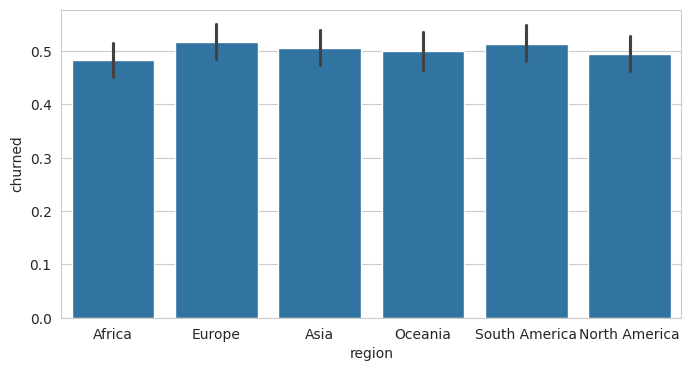

In [22]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'region', y = 'churned', data = df)

<Axes: xlabel='subscription_type', ylabel='churned'>

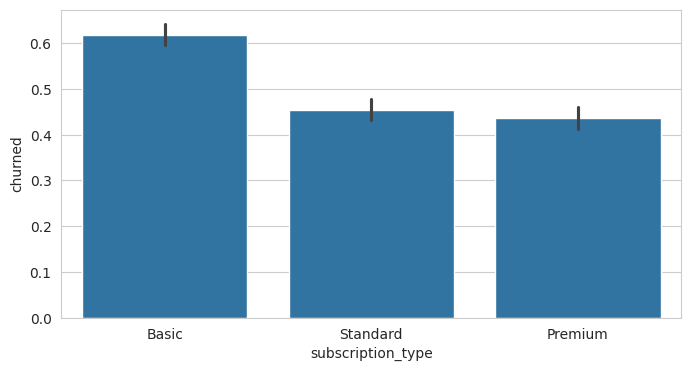

In [23]:
plt.figure(figsize = (8,4))
sns.barplot(x = 'subscription_type', y = 'churned', data = df)

#**Histogram / KDE of ALL numeric columns**
These tell you about:
- skewness
- outliers
- scaling requirement
- transformation requirement


**KDE plot's y axis == density**
- Density is not a count ---> It's a relative concentration.
- how common values around that point are


**❌ “Density is 0.017 so 1.7% of users are here” → Wrong**

Density is per unit on the x-axis, not a probability.

To get probability ---> Area under the curve between two x-values




##**Skewness**
- Mean becomes misleading
- Mean gets pulled toward the tail Median becomes a better measure.
- ex : [5, 6, 7, 8, 100] → mean = 25.2, median = 7
- Outliers domindate learning

**Skewed data is ok with Tree models as they don't care about distribution or shpae**

To handle Skewed data we need **Transformations**
- Log transform
- Square root
- Box-Cox / Yeo-Johnson

**Or use median instead of mean for filling missing values. **
| Situation                 | Action                    |
| ------------------------- | ------------------------- |
| Heavy skew + linear model | Apply log transform       |
| Heavy skew + tree model   | Often no change needed    |
| Skewed target             | Transform target variable |
| Mean looks weird          | Use median                |


<Axes: xlabel='age', ylabel='Count'>

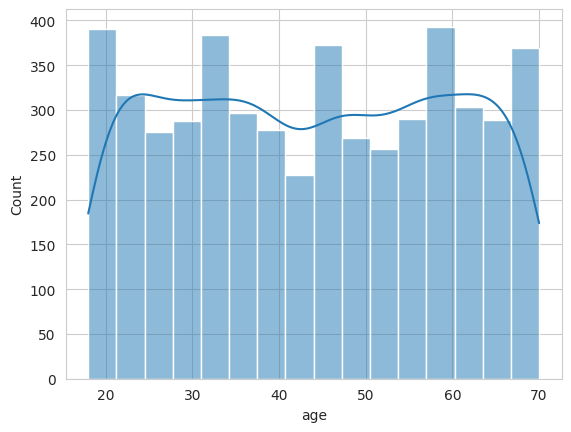

In [24]:
sns.histplot(x = 'age', data = df, kde = True)

<Axes: xlabel='watch_hours', ylabel='Density'>

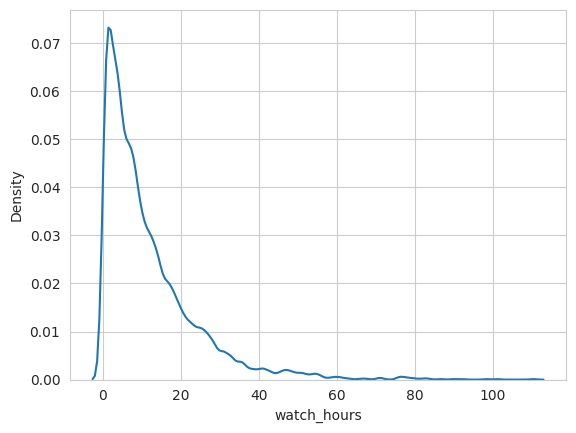

In [25]:
sns.kdeplot(df.watch_hours, bw_adjust=0.4)   # bw_adjust for smoothness

<Axes: xlabel='last_login_days', ylabel='Density'>

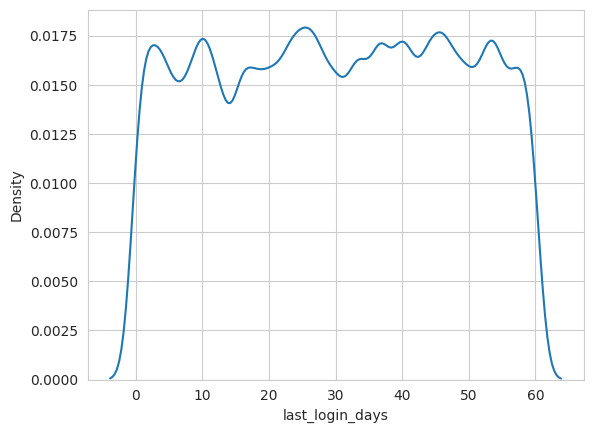

In [26]:
sns.kdeplot(x = 'last_login_days', bw_adjust=0.4, data = df)

<Axes: xlabel='last_login_days', ylabel='Count'>

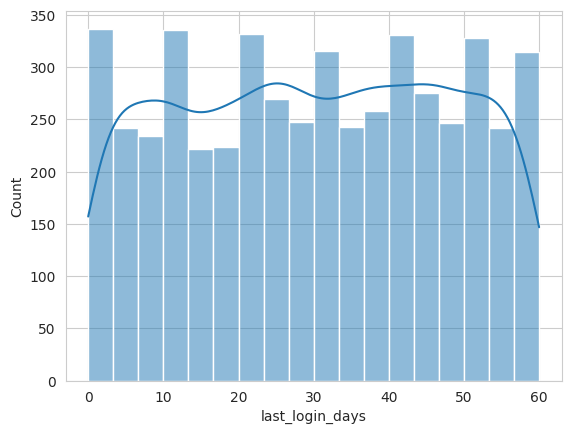

In [27]:
sns.histplot(x = 'last_login_days', data = df, kde = True)

In [28]:
pd.crosstab(df["last_login_days"], df['churned'])

## jida jida no.of last login days are increasing : churned rate is also increasing.

churned,0,1
last_login_days,,
0,78,3
1,75,10
2,80,10
3,69,12
4,81,12
...,...,...
56,19,53
57,20,63
58,21,62


<Axes: xlabel='last_login_days', ylabel='Count'>

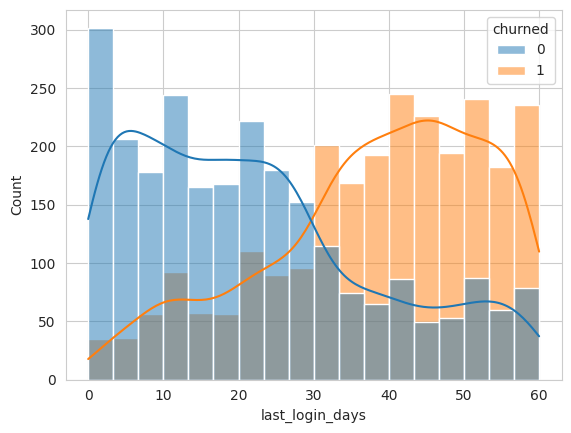

In [29]:
sns.histplot(x = 'last_login_days', data = df, kde = True, hue = 'churned')

<Axes: xlabel='monthly_fee', ylabel='Density'>

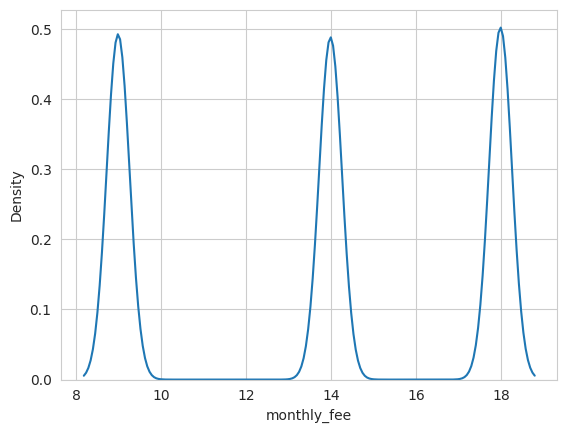

In [30]:
sns.kdeplot(x = 'monthly_fee', data = df, bw_adjust= 0.4)

<Axes: xlabel='monthly_fee', ylabel='Density'>

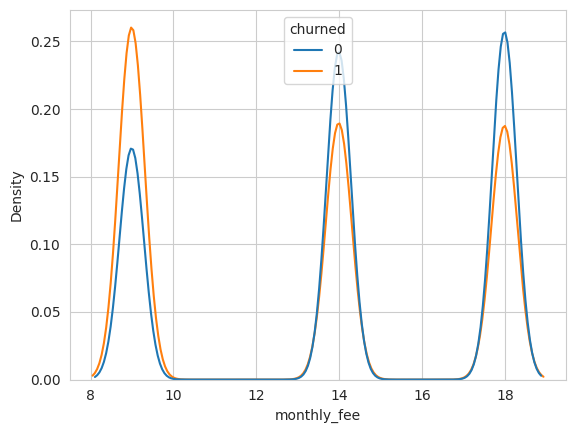

In [31]:
sns.kdeplot(x = 'monthly_fee', data = df, bw_adjust= 0.4, hue = 'churned')

#Density is not telling you whether churn happens at a price — only how concentrated churned vs non-churned users are around that price.

In [32]:
pd.crosstab(df["monthly_fee"], df["churned"], normalize="index")

churned,0,1
monthly_fee,,
8.99,0.381698,0.618302
13.99,0.545565,0.454435
17.99,0.562906,0.437094


<Axes: xlabel='number_of_profiles', ylabel='Count'>

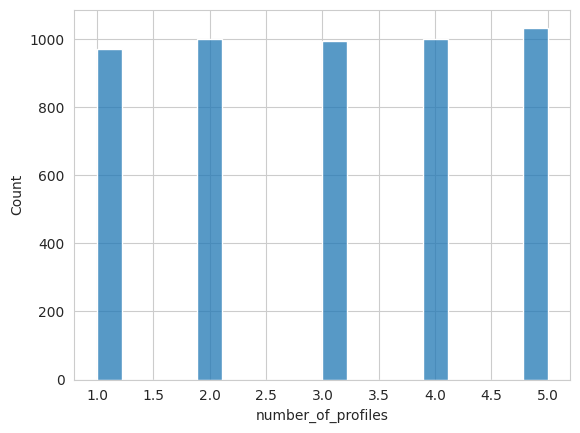

In [33]:
sns.histplot(x = 'number_of_profiles', data = df)

<Axes: xlabel='avg_watch_time_per_day', ylabel='Density'>

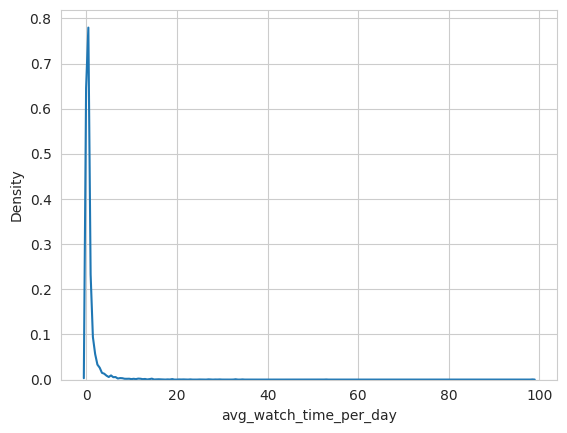

In [34]:
sns.kdeplot(x = 'avg_watch_time_per_day', data = df, bw_adjust= 0.4)

#**Boxplot for churned and outliers**
It's v imp when we are working on Linear and Logistic Regression

<Axes: xlabel='churned', ylabel='watch_hours'>

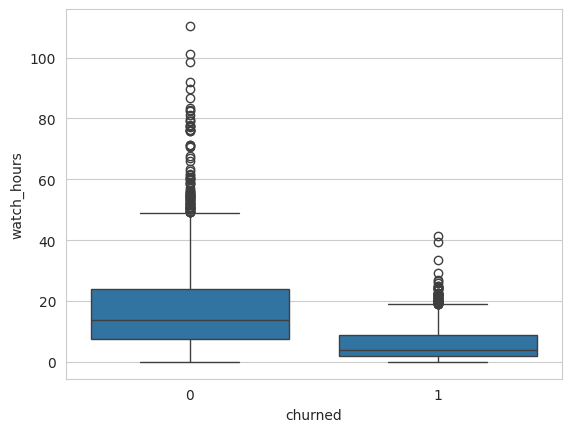

In [35]:
sns.boxplot(y = 'watch_hours', x = 'churned', data = df)

<Axes: xlabel='churned', ylabel='avg_watch_time_per_day'>

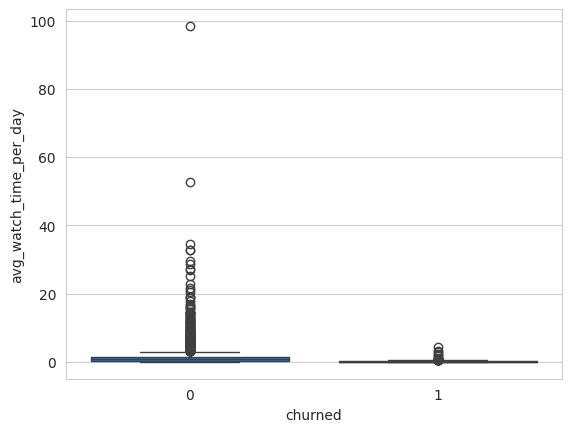

In [36]:
sns.boxplot(y = 'avg_watch_time_per_day', x = 'churned', data = df)

<Axes: xlabel='churned', ylabel='number_of_profiles'>

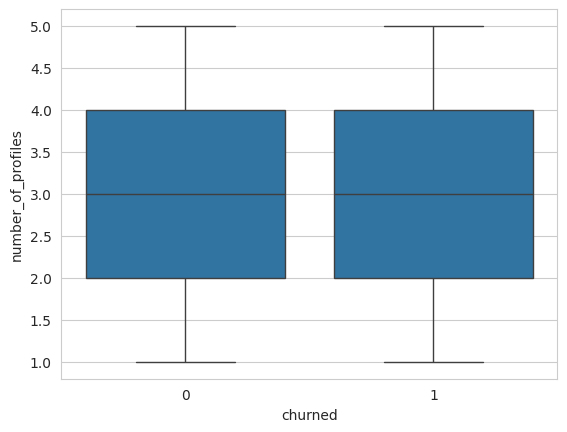

In [37]:
sns.boxplot(y = 'number_of_profiles', x = 'churned', data = df)

# i've checked this for rest all numerical values and everyother is fine except 2 above plots

**Those outliers are mostly in churned = 0 (non-churn users)**

That makes complete sense ---> extremely active users don’t churn.

So these are not “errors” necessarily — they can be real high-engagement users.


**##What to do about outliers? (Best decision)**
✅ DO NOT delete them blindly

Because:

  - they are likely real

  - churn models need these extreme loyal users too

  - if you remove them, you reduce your model's real-world performance

✅ Recommended approach

Since you are using LR / ML models, do winsorization / capping
This keeps values but prevents model distortion.

###**Best method: IQR capping**

  For example:

  - cap values above Q3 + 1.5*IQR

  -cap values below Q1 - 1.5*IQR

**Alternative (also good):**

### **✅ log transform**

watch_hours_log = log1p(watch_hours)

avg_watch_time_per_day_log = log1p(avg_watch_time_per_day)

**If you are planning Logistic Regression → log transform is 🔥**

# Correlation and pairplot

####**Why you should NOT remove outliers first**

If you treat outliers before plotting:

  - You might delete real signal
  - You hide non-linear relationships
  - You bias correlations toward “normal” users only

Outliers often:
  - Drive churn
  - Drive revenue
  - Reveal segmentation issues

Especially in user / business data, outliers are often the most interesting users.


####**The right order (almost always)**
1️⃣ Plot first (with outliers)

→ correlation heatmap
→ pairplot (or selected pairs)

2️⃣ Understand what the outliers are

→ data error?
→ rare but real users?
→ special segment (VIPs, enterprise, fraud, edge cases)?

3️⃣ Decide how to treat them

→ keep
→ cap (winsorize)
→ log-transform
→ remove (last resort)

###**Heatmap correlation = usually Pearson correlation**

And Pearson correlation is mathematically defined for numeric variables. That's why we take numerical values for heatmap only.

**If we encode them as:**

  - TV = 0, Mobile = 1, Tablet = 2

**Then correlation becomes fake / misleading because:**
  - correlation assumes ordering and distance

  - but categories have no order

  - So a correlation heatmap including raw label-encoded categories is wrong analysis.

  ### **But can we measure association for categorical?**

✅ Yes — not Pearson correlation, but categorical association metrics.

**1) Categorical vs categorical**

Use:

1. Chi-square test (most common)
2. Cramér’s V (gives correlation-like 0→1 strength)

**2) Categorical vs numeric**

Use:
✅ ANOVA / Kruskal-Wallis

<Axes: >

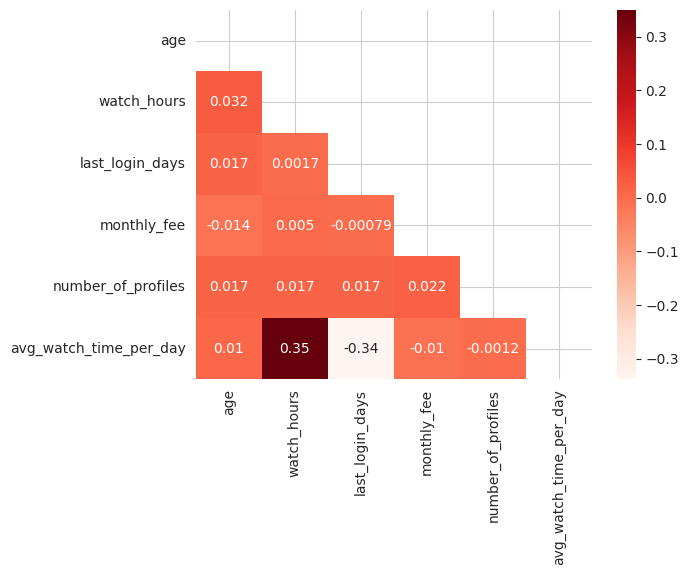

In [38]:
numeric_cols = ['age', 'watch_hours', 'last_login_days',	'monthly_fee', 'number_of_profiles', 'avg_watch_time_per_day']
corr = df[numeric_cols].corr()
mask = np.triu(np.ones_like( corr, dtype = bool))   #np.triu → upper triangle

sns.heatmap(corr,
            mask = mask,
            annot=True,
            cmap="Reds")

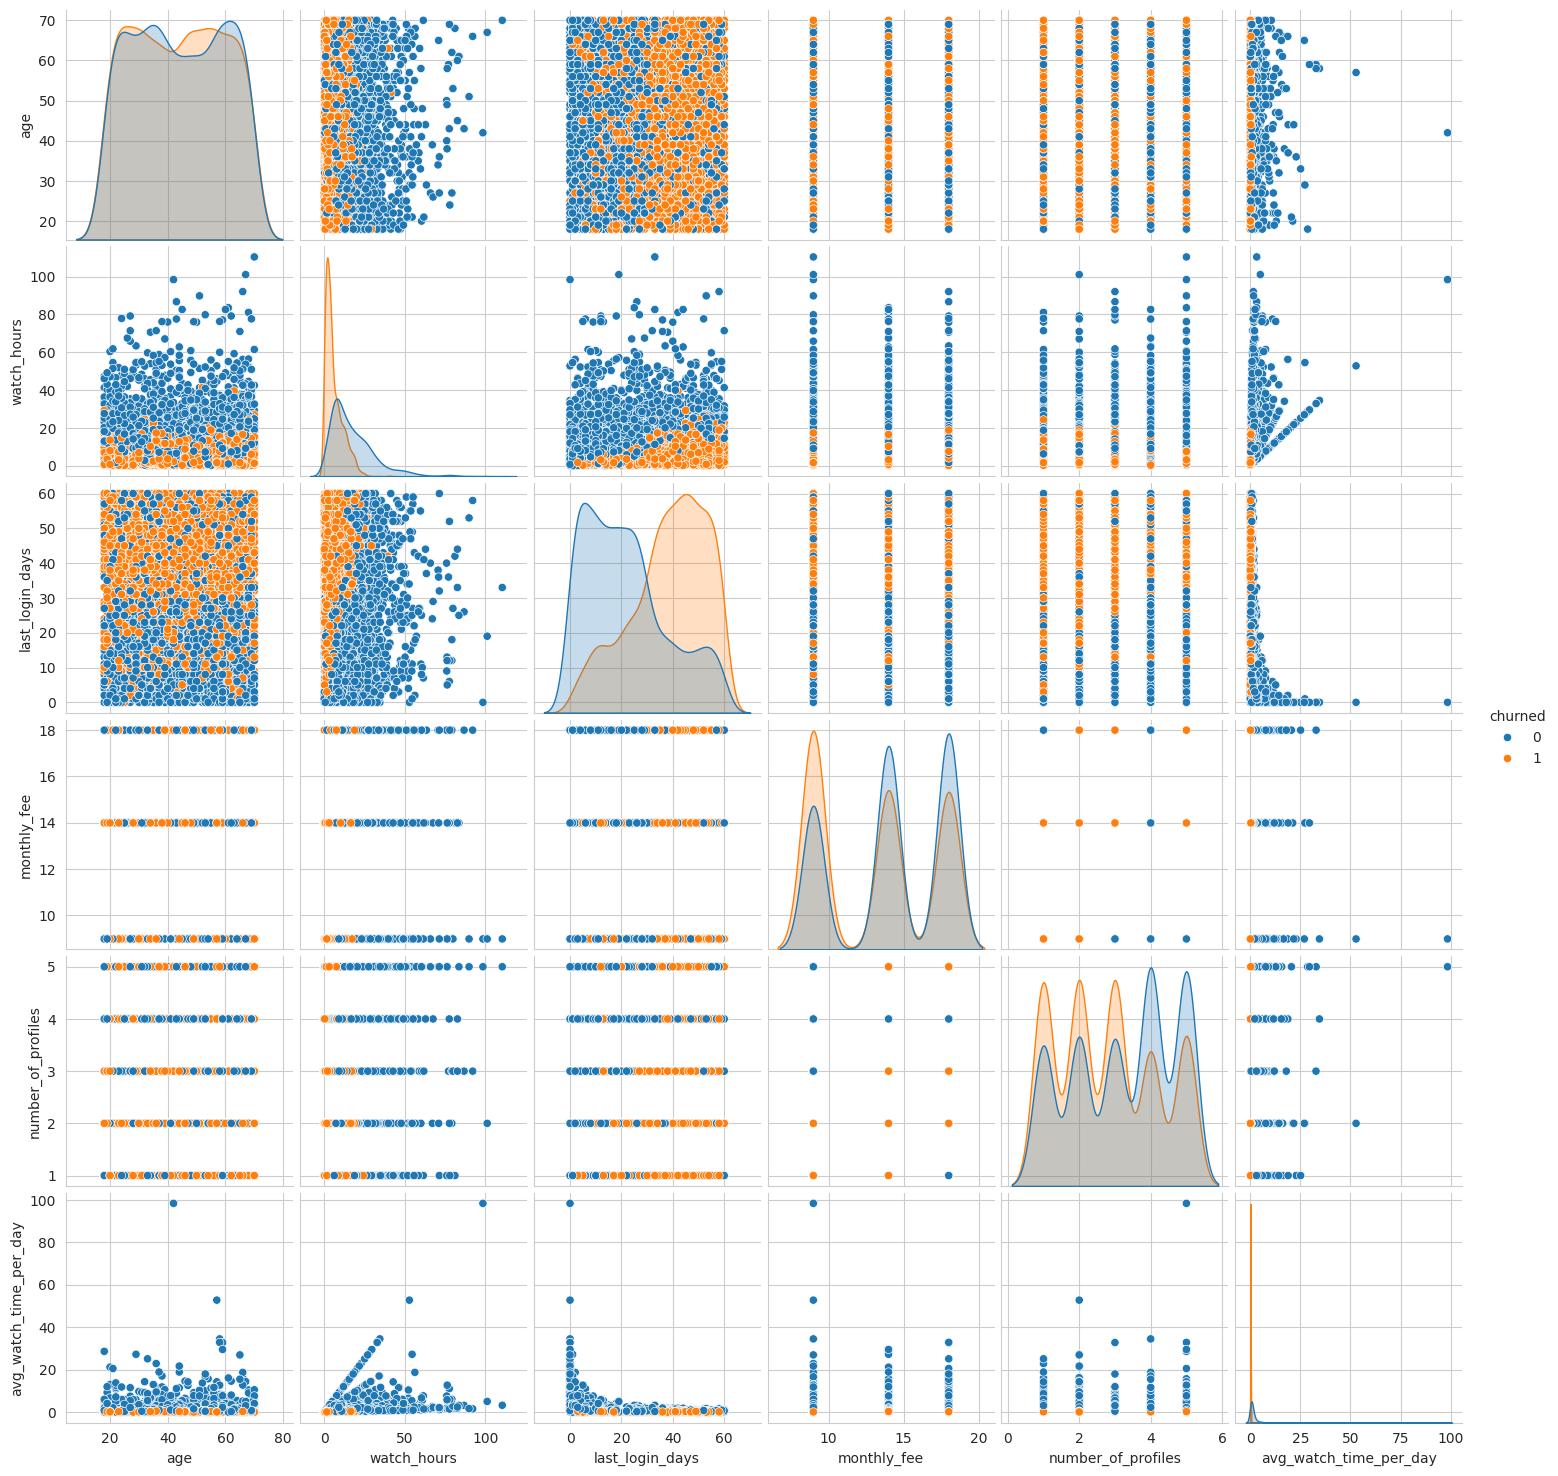

In [39]:
sns.pairplot(df, hue = 'churned')

#**Treating outliers**

In [40]:
df['log_watch_hours'] = np.log1p(df['watch_hours'])

#log1p() reduces the “gap” between small and very large values.

'\nLog transform is NOT meant to “remove outliers” completely.\nIt’s meant to compress extreme values so they don’t dominate the model.\n\nWhy are outliers still there for non-churned (0)? Because those users are genuinely heavy watchers\n'

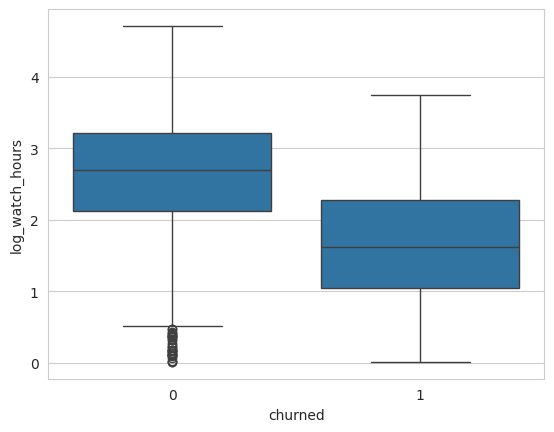

In [41]:
sns.boxplot(y = 'log_watch_hours', x = 'churned', data = df)

'''
Log transform is NOT meant to “remove outliers” completely.
It’s meant to compress extreme values so they don’t dominate the model.

Why are outliers still there for non-churned (0)? Because those users are genuinely heavy watchers
'''

**99th percentile capping (winsorization)**

In [42]:
hi = df['avg_watch_time_per_day'].quantile(0.99)
df['avg_watch_time_per_day_cap'] = df['avg_watch_time_per_day'].clip(upper=hi)
df['log_avg_watch_time_per_day'] = np.log1p(df['avg_watch_time_per_day_cap'])

<Axes: xlabel='churned', ylabel='log_avg_watch_time_per_day'>

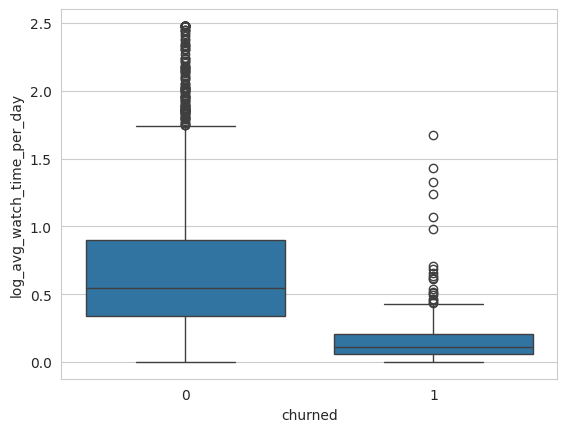

In [43]:
sns.boxplot(x = 'churned', y = 'log_avg_watch_time_per_day', data = df)

In [44]:
hi = df['avg_watch_time_per_day'].quantile(0.95)   # or 0.95
df['avg_watch_time_per_day_cap'] = df['avg_watch_time_per_day'].clip(upper=hi)
df['log_avg_watch_time_per_day'] = np.log1p(df['avg_watch_time_per_day_cap'])

In [45]:
df.head(2)

,customer_id,age,gender,subscription_type,watch_hours,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,avg_watch_time_per_day,favorite_genre,log_watch_hours,avg_watch_time_per_day_cap,log_avg_watch_time_per_day
0,a9b75100-82a8-427a-a208-72f24052884a,51,Other,Basic,14.73,29,Africa,TV,8.99,1,Gift Card,1,0.49,Action,2.755570,0.49,0.398776
1,49a5dfd9-7e69-4022-a6ad-0a1b9767fb5b,47,Other,Standard,0.70,19,Europe,Mobile,13.99,1,Gift Card,5,0.03,Sci-Fi,0.530628,0.03,0.029559


<Axes: xlabel='churned', ylabel='log_avg_watch_time_per_day'>

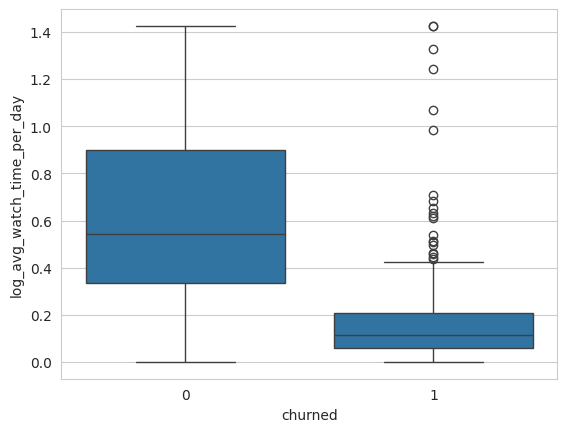

In [46]:
sns.boxplot(x = 'churned', y = 'log_avg_watch_time_per_day', data = df)

#**Dropped columns**

In [47]:
df.drop(columns = ['customer_id', 'watch_hours', 'avg_watch_time_per_day', 'avg_watch_time_per_day_cap'], inplace = True)
df.head(2)

,age,gender,subscription_type,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,favorite_genre,log_watch_hours,log_avg_watch_time_per_day
0,51,Other,Basic,29,Africa,TV,8.99,1,Gift Card,1,Action,2.755570,0.398776
1,47,Other,Standard,19,Europe,Mobile,13.99,1,Gift Card,5,Sci-Fi,0.530628,0.029559


#**Splitting the dataset before one hot encoding**
bcz of leakage to target value.
- after splitting fit and transform
- scale and one hot encoding same time te bcz scale only for numeric

  |--> categorical (after one hot encoding) still faida hni bcz it's unnecessary and sometimes reduces interpretability for Logistic Regression

In [48]:
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression

In [49]:
from sklearn import pipeline
# ---- 1) Split features/target ----
X = df.drop("churned", axis=1)
y = df["churned"]

# ---- 2) Train-test split ----
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ---- 3) Columns ----
num_cols = [
    "age", "last_login_days", "monthly_fee", "number_of_profiles",
    "log_watch_hours", "log_avg_watch_time_per_day"
]

cat_cols = [
    "gender", "subscription_type", "region", "device",
    "payment_method", "favorite_genre"
]

#-------4) Preprocessing using ColumnTransformer -------
preprocess = ColumnTransformer(
    transformers= [
        ("num", StandardScaler(), num_cols),
        ("cat", OneHotEncoder(handle_unknown = 'ignore', drop = 'first'), cat_cols)
    ],
    remainder = 'drop'  #Any column NOT explicitly listed in the transformers should be removed.

)
'''
“Take my dataset and:
  apply StandardScaler only to numerical columns
  apply OneHotEncoder only to categorical columns
  drop anything else”
'''
#-------5) Full pipeline: preprocess + model ----
model = Pipeline( steps = [
    ("preprocess", preprocess),
    ("clf", LogisticRegression(max_iter=1000))
]
)

'''
“Whenever I call .fit():
  Fit the scaler and encoder only on training data
  Transform the data
  Train logistic regression on the transformed features”

preprocess : combining num and cat values

in normal ML:
  clf = LogisticRegression(max_iter=1000)
  clf.fit(X_final, y)
'''


#----6) fit model -------------
model.fit(X_train, y_train)

#---7) predict-----------
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:,1]

# ---- 8) Metrics ----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


'''
support = number of actual samples of that class in the test set

So here:
  Class 0 (non-churn): support 497
  Class 1 (churn): support 503
  Total test size = 497 + 503 = 1000

It has nothing to do with probability — it’s just count.
'''

Accuracy: 0.894
ROC AUC: 0.9715629762671456

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.87      0.89       497
           1       0.88      0.92      0.90       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000


Confusion Matrix:
 [[433  64]
 [ 42 461]]


'\nsupport = number of actual samples of that class in the test set\n\nSo here:\n  Class 0 (non-churn): support 497\n  Class 1 (churn): support 503\n  Total test size = 497 + 503 = 1000\n\nIt has nothing to do with probability — it’s just count.\n'

I forgot to tune my logistic model it might have been the best model but i reminded at last now i'm doing it hence rf is the best model for now.



#**If model didn't perfomed well then use cross validation(kfoldcv)**
mine perfomed well so not using it. went directly to plots

##Defination of Imp stuff
**1️⃣ Precision**

**Definition: Of all the times your model said “this user will churn,” how many actually did churn?**

Think:

Precision = “How trustworthy is a positive prediction?”

High precision → few false alarms

**Precision = TP/ (TP+FP)**

Example:

Model predicts 100 users will churn

88 of them actually churn

Precision = 88%

💡 In business: High precision → you don’t waste resources on users who aren’t at risk.

**2️⃣ Recall (aka Sensitivity)**

**Definition: Of all the actual churners, how many did your model catch?**

Think:

Recall = “How good are we at catching all the churners?”

High recall → few missed churners

**Recall = TP / (TP+FN)**

Example:

500 users actually churn

Model correctly identifies 460 of them

Recall = 92%

💡 In business: High recall → fewer missed churners, more opportunity to retain them.

Often in churn prediction, recall is more important than precision, because missing a churner (false negative) is costly.


**3️⃣ F1-score**

**Definition: A balance between precision and recall. It’s like a “middle ground” score.**

Think:

F1 is high only if both precision and recall are reasonably high

Helps compare models when you want a balance

**F1 = 2xPxR/ (P+R)**

Example:

Precision = 0.88, Recall = 0.92 → F1 ≈ 0.90

💡 In business: Tells you overall effectiveness of catching churners without too many false alarms.

**4️⃣ Accuracy**

**Definition: Of all predictions, how many did you get correct?**

Think:

Accuracy = “How often is the model right overall?”

Can be misleading if classes are imbalanced
**Accuracy = TP+TN/ (TP+TN+FP+FN)**

Example:

1000 users, 900 predicted correctly → Accuracy = 90%

But if only 10 users churn, predicting everyone “non-churn” gives 99% accuracy → misleading

**5️⃣ Threshold**

**Definition: The probability above which you classify a user as churn.**

Think:

Logistic Regression predicts chances of churn (0 to 1)

Threshold = cutoff for “yes, this user will churn”

Default: 0.5 → >50% = churn, ≤50% = non-churn

Lower threshold → more users flagged as churn → higher recall, lower precision

Higher threshold → fewer flagged → lower recall, higher precision

💡 Key for business decisions: Threshold is how aggressive you want to be in predicting churn.


##**🔑 How they tie together**

Precision → Of those flagged, how trustworthy are they? (FP matters)

Recall → Of all real churners, how many did you catch? (FN matters)

F1 → Balance of both

Threshold → The lever you pull to trade precision vs recall

Accuracy → Overall correctness, less useful in imbalanced datasets

**Drawing ROC, precision-recall, threshold curves**

This ensures you’re not blindly switching to a more complex model without knowing if it improves things

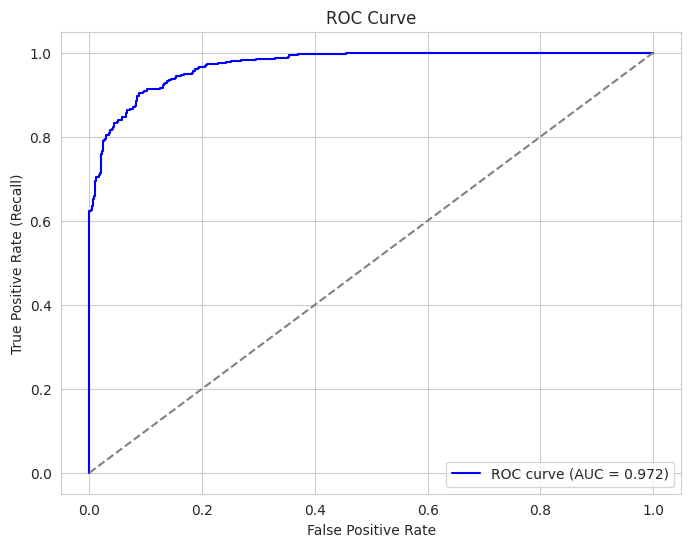

'\nx-axis = FPR (False Positive Rate)\nFPR= FP/ (FP+TN )\n\nMeaning: Out of non-churners, how many were wrongly flagged as churn?\n\ny-axis = TPR (True Positive Rate) = Recall\n𝑇𝑃𝑅 = 𝑅𝑒𝑐all = 𝑇𝑃 / (𝑇𝑃 + 𝐹𝑁)\n\n\n\nROC interpretation\n✅ The ideal ROC curve:\n  goes straight up (high recall)\n  then goes straight right\n  Meaning:\n  ✅ catch many churners\n  ✅ with very few false positives\n\n❌ Bad ROC:\ndiagonal line (random guessing)\n\nMeaning of AUC: Probability that the model ranks a random churner higher than a random non-churner.\n\nAUC = 0.5 → random\nAUC = 1.0 → perfect\n\nYour model: 0.97 → extremely strong\n\n✅ So ROC-AUC tells: how good your model is at ranking\n\n'

In [50]:
# ROC measures ranking ability:
# “Does the model assign higher churn probability to churners than non-churners?”

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
auc_score = roc_auc_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc_score:.3f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve')
plt.legend()
plt.show()

'''
x-axis = FPR (False Positive Rate)
FPR= FP/ (FP+TN )

Meaning: Out of non-churners, how many were wrongly flagged as churn?

y-axis = TPR (True Positive Rate) = Recall
𝑇𝑃𝑅 = 𝑅𝑒𝑐all = 𝑇𝑃 / (𝑇𝑃 + 𝐹𝑁)



ROC interpretation
✅ The ideal ROC curve:
  goes straight up (high recall)
  then goes straight right
  Meaning:
  ✅ catch many churners
  ✅ with very few false positives

❌ Bad ROC:
diagonal line (random guessing)

Meaning of AUC: Probability that the model ranks a random churner higher than a random non-churner.

AUC = 0.5 → random
AUC = 1.0 → perfect

Your model: 0.97 → extremely strong

✅ So ROC-AUC tells: how good your model is at ranking

'''

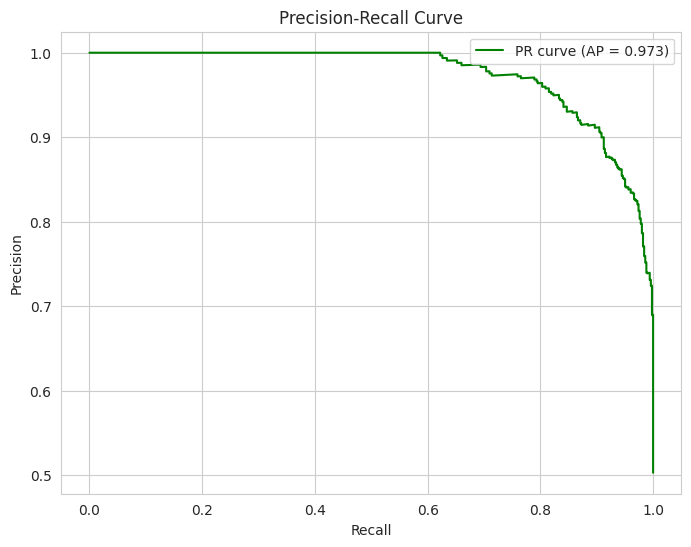

'\nPR curve is especially important when:\n  dataset is imbalanced\n  we care more about catching positives (churners)\n  Even though your dataset is ~50/50, PR curve is still a great indicator.\n\nKey insight\n  ✅ Average Precision (AP) = 0.973 is extremely high.\n  This means:\n  your model maintains high precision even when recall increases.\n\nInterpretation\nAt high recall (~0.8–0.9), precision stays high (~0.9+)\nOnly when recall is forced close to 1.0, precision drops (normal)\n\n✅ Conclusion: Model is extremely strong at detecting churners.\n'

In [51]:
#Precision-Recall Curve

##------ It's majorly helpful when dataset is imbalanced-----------------

# It directly shows the tradeoff between:
# ✅ catching churners
# vs
# ✅ being correct when you predict churn

from sklearn.metrics import precision_recall_curve, average_precision_score, f1_score

precision, recall, pr_thresholds = precision_recall_curve(y_test, y_prob)
ap_score = average_precision_score(y_test, y_prob)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, label=f'PR curve (AP = {ap_score:.3f})', color='green')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


'''
PR curve is especially important when:
  dataset is imbalanced
  we care more about catching positives (churners)
  Even though your dataset is ~50/50, PR curve is still a great indicator.

Key insight
  ✅ Average Precision (AP) = 0.973 is extremely high.
  This means:
  your model maintains high precision even when recall increases.

Interpretation
At high recall (~0.8–0.9), precision stays high (~0.9+)
Only when recall is forced close to 1.0, precision drops (normal)

✅ Conclusion: Model is extremely strong at detecting churners.
'''



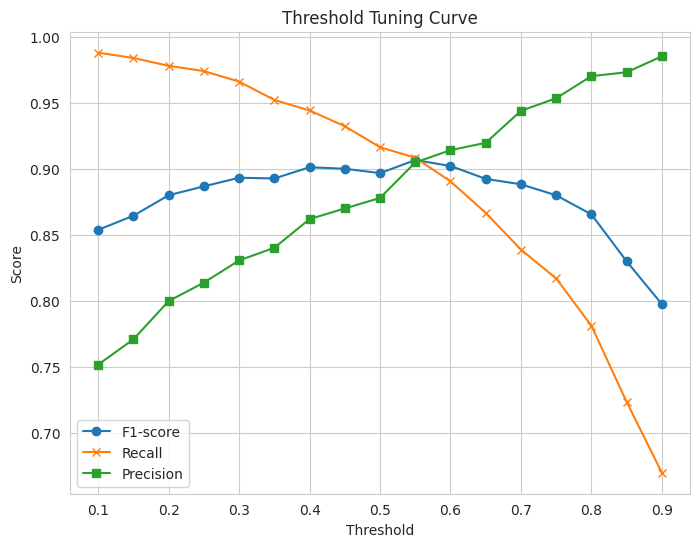

'\nMost important insight\n\n✅ Your F1 score peaks around threshold ~0.45–0.60 (approx).\nYou even see F1 highest near the middle.\n\nWhat you should do\n\nPick threshold based on business need:\n\n✅ If Netflix wants to catch more churners (use retention offers):\n➡️ choose threshold around 0.35–0.45 (higher recall)\n\n✅ If Netflix wants to avoid wasting offers on non-churn users (costly promotions):\n➡️ choose threshold around 0.60–0.70 (higher precision)\n\n✅ If you want “balanced best” for project:\n➡️ choose threshold where F1 max (around ~0.5)\n'

In [52]:
#Threshold tuning curve (F1 / Recall / Precision vs threshold)
# This plot is very important — it tells you ---->  which cutoff probability should be used.

thresholds_to_test = np.arange(0.1, 0.91, 0.05)
f1_scores = []
recalls = []
precisions = []

for t in thresholds_to_test:
    y_pred_thresh = (y_prob >= t).astype(int)
    f1_scores.append(f1_score(y_test, y_pred_thresh))
    recalls.append((y_test & y_pred_thresh).sum() / y_test.sum())  # recall
    precisions.append((y_test & y_pred_thresh).sum() / y_pred_thresh.sum())  # precision

plt.figure(figsize=(8,6))
plt.plot(thresholds_to_test, f1_scores, label='F1-score', marker='o')
plt.plot(thresholds_to_test, recalls, label='Recall', marker='x')
plt.plot(thresholds_to_test, precisions, label='Precision', marker='s')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning Curve')
plt.legend()
plt.grid(True)
plt.show()

'''
Most important insight

✅ Your F1 score peaks around threshold ~0.45–0.60 (approx).
You even see F1 highest near the middle.

What you should do

Pick threshold based on business need:

✅ If Netflix wants to catch more churners (use retention offers):
➡️ choose threshold around 0.35–0.45 (higher recall)

✅ If Netflix wants to avoid wasting offers on non-churn users (costly promotions):
➡️ choose threshold around 0.60–0.70 (higher precision)

✅ If you want “balanced best” for project:
➡️ choose threshold where F1 max (around ~0.5)
'''

                       feature      coef  abs_coef
5   log_avg_watch_time_per_day -2.630349  2.630349
4              log_watch_hours -1.944180  1.944180
1              last_login_days  1.867121  1.867121
19       payment_method_Crypto  1.675040  1.675040
21    payment_method_Gift Card  1.522565  1.522565
3           number_of_profiles -1.238566  1.238566
9   subscription_type_Standard -0.985003  0.985003
2                  monthly_fee -0.903961  0.903961
20   payment_method_Debit Card -0.373077  0.373077
25        favorite_genre_Drama  0.285828  0.285828


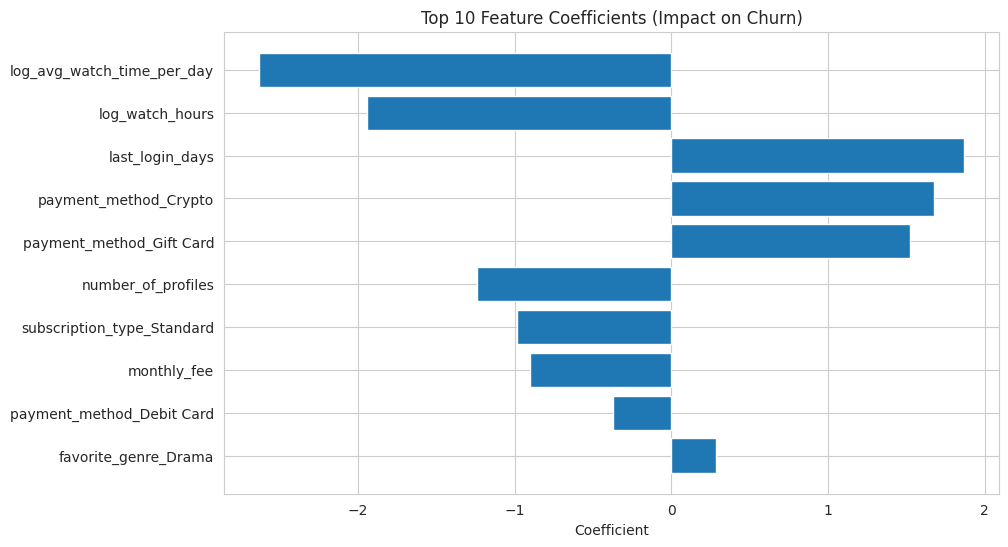

In [53]:
# Extract preprocessing and classifier from pipeline

preprocessor = model.named_steps['preprocess']
clf = model.named_steps['clf']

# Get numeric feature names
num_features = preprocessor.transformers_[0][2]

# Get categorical feature names after one-hot encoding
cat_transformer = preprocessor.transformers_[1][1]  # OneHotEncoder
cat_features = cat_transformer.get_feature_names_out(preprocessor.transformers_[1][2])

# Combine all feature names
all_features = np.concatenate([num_features, cat_features])

# Coefficients
coef = clf.coef_[0]
feature_importance = pd.DataFrame({'feature': all_features, 'coef': coef})
feature_importance['abs_coef'] = feature_importance['coef'].abs()
feature_importance = feature_importance.sort_values(by='abs_coef', ascending=False)

# Top 10
print(feature_importance.head(10))

# Optional: Plot
plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'][:10][::-1], feature_importance['coef'][:10][::-1])
plt.xlabel('Coefficient')
plt.title('Top 10 Feature Coefficients (Impact on Churn)')
plt.show()


# Positive coefficient → increases churn probability
# Negative coefficient → reduces churn probability

In [54]:
df.head(2)

,age,gender,subscription_type,last_login_days,region,device,monthly_fee,churned,payment_method,number_of_profiles,favorite_genre,log_watch_hours,log_avg_watch_time_per_day
0,51,Other,Basic,29,Africa,TV,8.99,1,Gift Card,1,Action,2.755570,0.398776
1,47,Other,Standard,19,Europe,Mobile,13.99,1,Gift Card,5,Sci-Fi,0.530628,0.029559


In [55]:
from sklearn.ensemble import RandomForestClassifier

preprocesses = ColumnTransformer(
    transformers = [
        ("num", "passthrough", num_cols),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop='first'), cat_cols)
    ],
    remainder = 'drop'
)

model = Pipeline(steps = [
    ("preprocess", preprocesses),
    ("clf", RandomForestClassifier(
        n_estimators=200,
        random_state=42,
        class_weight="balanced"
    ))
])

model.fit(X_train, y_train)

y_pred_rf = model.predict(X_test)
y_prob_rf = model.predict_proba(X_test)[:,1]

print(classification_report(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_prob))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       497
           1       0.88      0.92      0.90       503

    accuracy                           0.89      1000
   macro avg       0.89      0.89      0.89      1000
weighted avg       0.89      0.89      0.89      1000

ROC-AUC: 0.9715629762671456


**👉 We change threshold to match business cost trade-offs**

**What changing the threshold actually does**

Lower threshold (e.g. 0.4)

  - More users flagged as churn

  - ✅ Higher recall (catch more churners)

  - ❌ Lower precision (more false alarms)

Higher threshold (e.g. 0.6)

- Fewer users flagged

- ✅ Higher precision

- ❌ Lower recall (miss more churners)

So threshold is basically a volume control for how aggressive your model is.

In [56]:
## tuning RF model and then changing the threshold acc to the need
from sklearn.model_selection import RandomizedSearchCV

rf_pipeline = Pipeline(steps=[
    ("preprocess", preprocess),
    ("rf", RandomForestClassifier(
        random_state=42,
        class_weight="balanced",
        n_jobs=-1
    ))
])

param_dist = {
    "rf__n_estimators": [200, 400, 600],
    "rf__max_depth": [None, 5, 15, 25],
    "rf__min_samples_split": [2, 5, 10],
    "rf__min_samples_leaf": [1, 2, 5],
    "rf__max_features": ["sqrt", "log2"]
}

rf_tunedmodel = RandomizedSearchCV(
    estimator = rf_pipeline,
    param_distributions = param_dist,
    n_iter=30,                 # enough for RF
    scoring="roc_auc",         # BEST metric for churn
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)
#roc_auc → threshold-independent
# RandomizedSearch → faster, better coverage

rf_tunedmodel.fit(X_train, y_train)
print("model fit successfully")

Fitting 5 folds for each of 30 candidates, totalling 150 fits
model fit successfully


In [57]:
print("Best ROC AUC:", rf_tunedmodel.best_score_)
print("Best Params:", rf_tunedmodel.best_params_)

Best ROC AUC: 0.9971911369635157
Best Params: {'rf__n_estimators': 600, 'rf__min_samples_split': 5, 'rf__min_samples_leaf': 2, 'rf__max_features': 'sqrt', 'rf__max_depth': 25}


**now as i've got the best parms i need to find the confusion matrix at these parms to get the best out of my model.**
- best_score_ tells you at which parameter combination the model gave the best ROC-AUC on cross-validation.

ROC-AUC and PR-AUC do NOT depend on threshold

ROC curve and PR curve are built by sweeping all thresholds from 0 → 1.

So:
✅ you can plot ROC/PR anytime
✅ no need to wait for threshold choice

Because these plots show: how good your model ranking is overall

So for ROC/PR:
order doesn’t matter.

In [58]:
best_rf = rf_tunedmodel.best_estimator_

y_pred = best_rf.predict(X_test)
y_prob_tunedrf = best_rf.predict_proba(X_test)[:,1]

print("Test ROC-AUC", roc_auc_score(y_test, y_prob_tunedrf))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test ROC-AUC 0.9976559156129621
[[489   8]
 [ 10 493]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       497
           1       0.98      0.98      0.98       503

    accuracy                           0.98      1000
   macro avg       0.98      0.98      0.98      1000
weighted avg       0.98      0.98      0.98      1000



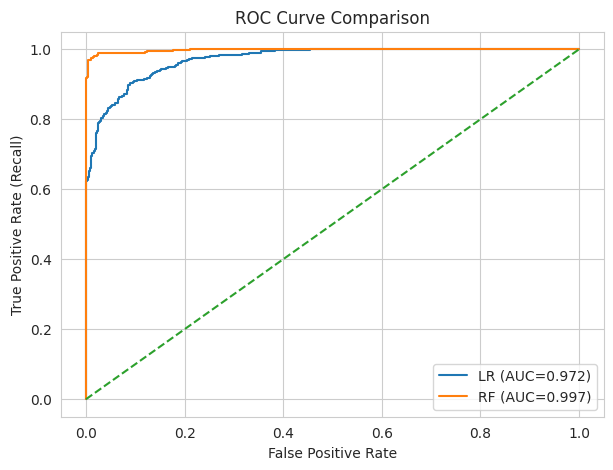

In [59]:
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_tunedrf)

plt.figure(figsize=(7,5))
plt.plot(fpr_lr, tpr_lr, label=f"LR (AUC={roc_auc_score(y_test, y_prob):.3f})")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC={roc_auc_score(y_test, y_prob_rf):.3f})")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()

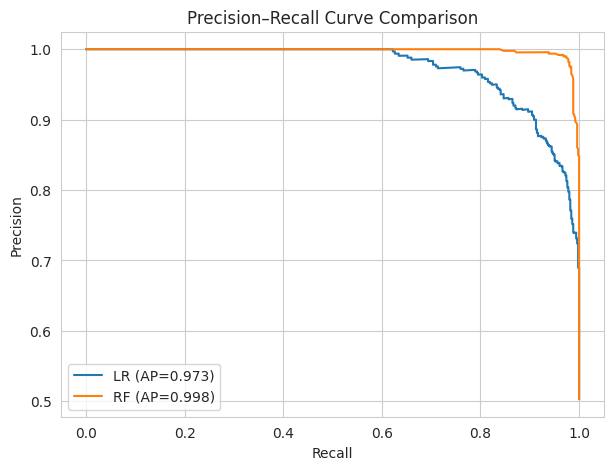

In [60]:
prec_lr, rec_lr, _ = precision_recall_curve(y_test, y_prob)
prec_rf, rec_rf, _ = precision_recall_curve(y_test, y_prob_rf)

ap_lr = average_precision_score(y_test, y_prob)
ap_rf = average_precision_score(y_test, y_prob_rf)

plt.figure(figsize=(7,5))
plt.plot(rec_lr, prec_lr, label=f"LR (AP={ap_lr:.3f})")
plt.plot(rec_rf, prec_rf, label=f"RF (AP={ap_rf:.3f})")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()


In [61]:
# best threshold for RF

def best_threshold(y_true, y_prob, step=0.01):
    ts = np.arange(0.1, 0.91, step)
    best_t, best_f1 = 0.5, -1

    for t in ts:
        y_pred = (y_prob >= t).astype(int)
        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_t = t

    return best_t, best_f1

y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

t_rf, f1_rf = best_threshold(y_test, y_prob_rf)
print("Best RF threshold:", t_rf)
print("Best RF F1:", f1_rf)


Best RF threshold: 0.4999999999999998
Best RF F1: 0.9820717131474104


In [62]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def metrics_table(name, y_true, y_prob, t):
    y_pred = (y_prob >= t).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    return {
        "Model": name,
        "Threshold": t,
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred),
        "Recall": recall_score(y_true, y_pred),
        "F1": f1_score(y_true, y_pred),
        "TP": tp,
        "FP": fp,
        "FN": fn,
        "TN": tn
    }

# probs
# y_prob_lr = model.predict_proba(X_test)[:, 1]
# y_prob_rf = best_rf.predict_proba(X_test)[:, 1]

# choose thresholds
t_lr = 0.5      # keep default LR threshold
t_rf = t_rf        # from best_threshold output above

# build table
res = pd.DataFrame([
    metrics_table("Logistic Regression", y_test, y_prob, t_lr),
    metrics_table("Random Forest (Tuned)", y_test, y_prob_rf, t_rf)
])

res


,Model,Threshold,Accuracy,Precision,Recall,F1,TP,FP,FN,TN
0,Logistic Regression,0.5,0.894,0.878095,0.916501,0.896887,461,64,42,433
1,Random Forest (Tuned),0.5,0.982,0.984032,0.980119,0.982072,493,8,10,489


In [64]:
# confusion matrix

def show_cm(name, y_true, y_prob, t):
    y_pred = (y_prob >= t).astype(int)
    print(name, "| threshold =", t)
    print(confusion_matrix(y_true, y_pred))
    print()

show_cm("Logistic Regression", y_test, y_prob, t_lr)
show_cm("Random Forest (Tuned)", y_test, y_prob_rf, t_rf)


Logistic Regression | threshold = 0.5
[[433  64]
 [ 42 461]]

Random Forest (Tuned) | threshold = 0.4999999999999998
[[489   8]
 [ 10 493]]



In [65]:
final_rf = rf_tunedmodel.best_estimator_
final_rf.fit(X, y)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age', 'last_login_days',
                                                   'monthly_fee',
                                                   'number_of_profiles',
                                                   'log_watch_hours',
                                                   'log_avg_watch_time_per_day']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'),
                                                  ['gender',
                                                   'subscription_type',
                                                   'region', 'device',
                                                   'payment_method',
                                                   'favorite_genre'])])),
                ('rf',
                 RandomForestClassifier(class_weight='balanced', max_depth=25,
                                        min_samples_leaf=2, min_samples_split=5,
                                        n_estimators=600, n_jobs=-1,
                                        random_state=42))])

In [66]:
ohe = best_rf.named_steps["preprocess"].named_transformers_["cat"]
cat_cols = best_rf.named_steps["preprocess"].transformers_[1][2]
num_cols = best_rf.named_steps["preprocess"].transformers_[0][2]

cat_feat = list(ohe.get_feature_names_out(cat_cols))
feat_names = list(num_cols) + cat_feat

rf_clf = best_rf.named_steps["rf"]
imps = rf_clf.feature_importances_

imp_df = pd.DataFrame({"feature": feat_names, "importance": imps}).sort_values("importance", ascending=False)
imp_df.head(20)


,feature,importance
5,log_avg_watch_time_per_day,0.379677
4,log_watch_hours,0.218125
1,last_login_days,0.186792
3,number_of_profiles,0.061415
2,monthly_fee,0.029179
0,age,0.018975
19,payment_method_Crypto,0.017719
21,payment_method_Gift Card,0.014909
8,subscription_type_Premium,0.009872
9,subscription_type_Standard,0.008605


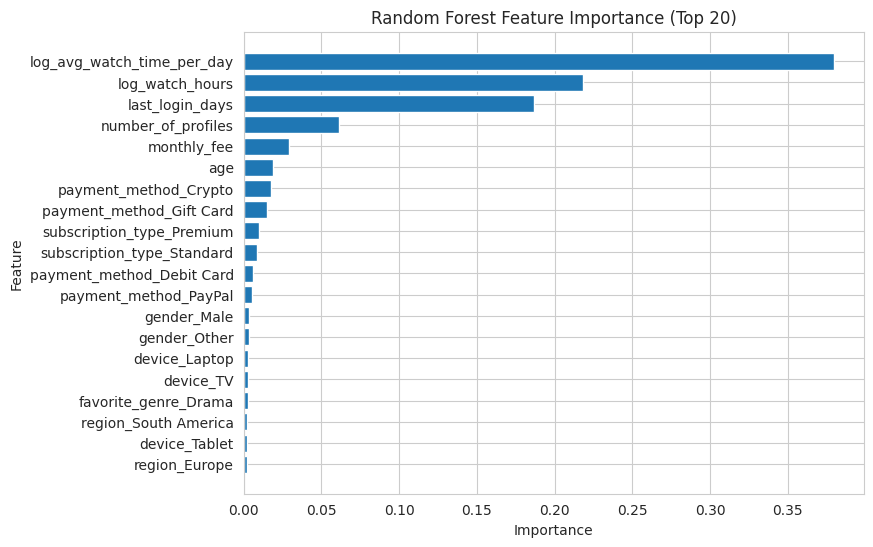

In [67]:
topn = 20
plot_df = imp_df.head(topn)[::-1]

plt.figure(figsize=(8,6))
plt.barh(plot_df["feature"], plot_df["importance"])
plt.title(f"Random Forest Feature Importance (Top {topn})")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.grid(True)
plt.show()


In [69]:
import joblib

joblib.dump(final_rf, "final_tuned_rf_churn_model.pkl")
joblib.dump(t_rf, "rf_threshold.pkl")
print("Saved final model + threshold")


Saved final model + threshold
